In [21]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [23]:
df1=pd.read_csv("data_orders.csv")
df1.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [24]:
df2=pd.read_csv("data_offers.csv")
df2.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [25]:
df=pd.merge(df1,df2,on="order_gk")
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,300050983403
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986179
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986174
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986180
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,300050976275


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31268 entries, 0 to 31267
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 31268 non-null  object 
 1   origin_longitude               31268 non-null  float64
 2   origin_latitude                31268 non-null  float64
 3   m_order_eta                    8364 non-null   float64
 4   order_gk                       31268 non-null  int64  
 5   order_status_key               31268 non-null  int64  
 6   is_driver_assigned_key         31268 non-null  int64  
 7   cancellations_time_in_seconds  21795 non-null  float64
 8   offer_id                       31268 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 2.1+ MB


In [27]:
df.describe()

,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
count,31268.000000,31268.000000,8364.000000,3.126800e+04,31268.000000,31268.000000,21795.000000,3.126800e+04
mean,-0.964122,51.450594,473.206480,3.000600e+12,5.514807,0.267494,163.861803,3.000515e+11
std,0.020753,0.011311,285.080429,2.308429e+07,2.297730,0.442659,200.136770,4.752934e+05
min,-1.066957,51.399523,60.000000,3.000551e+12,4.000000,0.000000,3.000000,3.000506e+11
25%,-0.974268,51.444830,238.000000,3.000584e+12,4.000000,0.000000,56.000000,3.000510e+11
50%,-0.966529,51.452061,419.000000,3.000595e+12,4.000000,0.000000,106.000000,3.000515e+11
75%,-0.949786,51.456630,658.000000,3.000624e+12,9.000000,1.000000,195.000000,3.000519e+11
max,-0.875727,51.496169,1387.000000,3.000633e+12,9.000000,1.000000,4303.000000,3.000524e+11


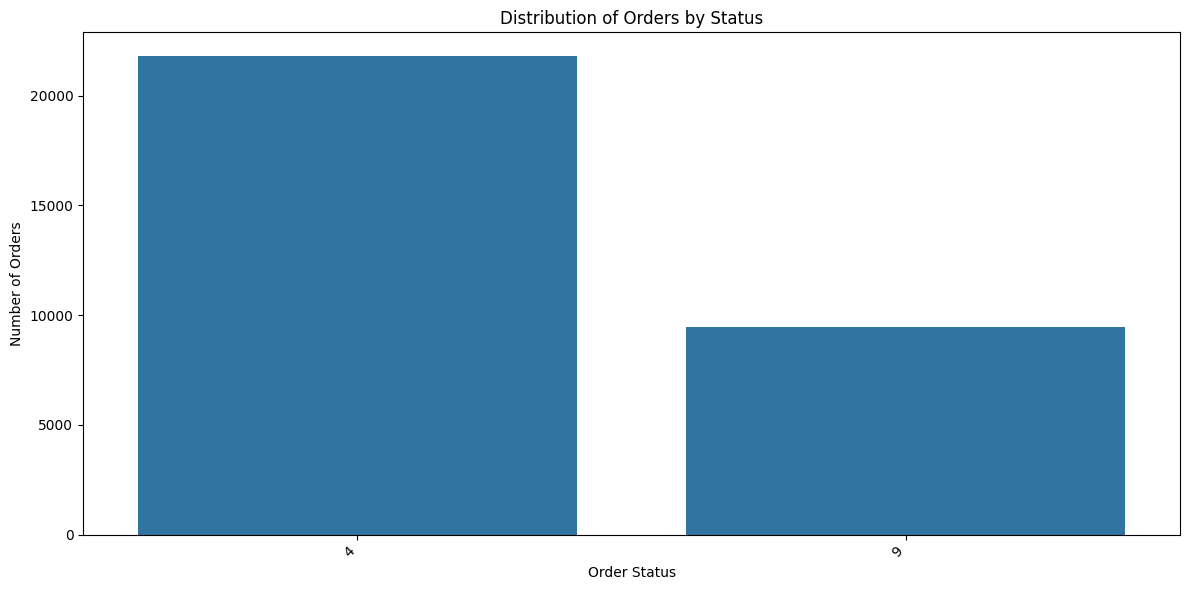


Order Status Distribution:
order_status_key
4    21795
9     9473
Name: count, dtype: int64


In [28]:
# Create a distribution plot of order failure reasons
plt.figure(figsize=(12, 6))
failure_dist = df['order_status_key'].value_counts()
sns.barplot(x=failure_dist.index, y=failure_dist.values)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Orders by Status')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

# Display the actual counts
print("\nOrder Status Distribution:")
print(failure_dist)

Status key 4 (cancellations by client) has the highest number of orders with 21,795 orders, which is significantly higher than status key 9 (system cancellations) which has 9,473 orders.

C:\Users\rohit\AppData\Local\Temp\ipykernel_6276\2237625283.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['order_datetime']).dt.hour


<Figure size 1500x700 with 0 Axes>

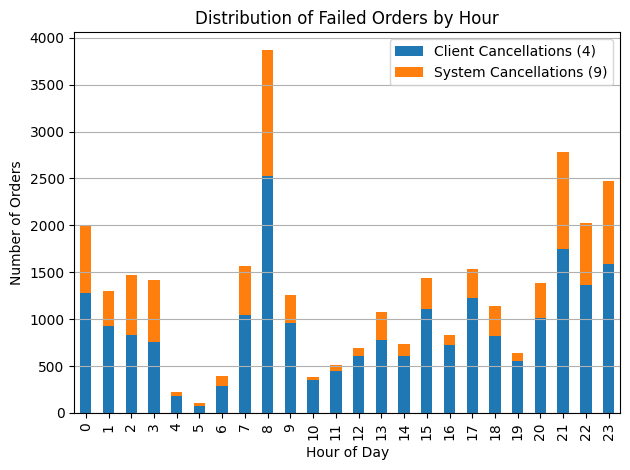


Hourly distribution of orders:
order_status_key     4     9
hour                        
0                 1283   710
1                  931   374
2                  826   649
3                  760   658
4                  182    45
5                   78    33
6                  283   109
7                 1040   526
8                 2527  1338
9                  964   294
10                 350    37
11                 445    65
12                 606    91
13                 778   294
14                 608   125
15                1109   335
16                 720   112
17                1221   319
18                 822   314
19                 549    95
20                1010   371
21                1746  1036
22                1369   660
23                1588   883

Percentage distribution by hour:
order_status_key          4          9
hour                                  
0                 64.375314  35.624686
1                 71.340996  28.659004
2                 56.000

In [29]:
# Extract hour from order_datetime
df['hour'] = pd.to_datetime(df['order_datetime']).dt.hour

# Create a stacked bar plot
plt.figure(figsize=(15, 7))
order_by_hour = pd.crosstab(df['hour'], df['order_status_key'])
order_by_hour.plot(kind='bar', stacked=True)
plt.title('Distribution of Failed Orders by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.legend(['Client Cancellations (4)', 'System Cancellations (9)'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Print the hourly distribution
print("\nHourly distribution of orders:")
print(order_by_hour)

# Calculate percentage of each type by hour
percentages = order_by_hour.div(order_by_hour.sum(axis=1), axis=0) * 100
print("\nPercentage distribution by hour:")
print(percentages)

<Figure size 1500x700 with 0 Axes>

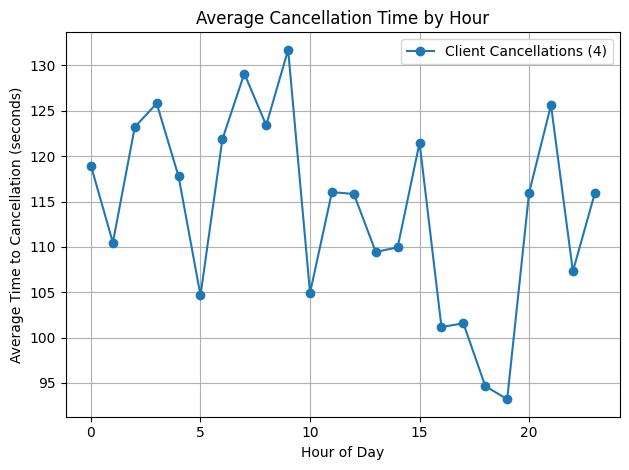


Average cancellation times by hour:
order_status_key           4
hour                        
0                 118.936614
1                 110.473807
2                 123.206897
3                 125.814599
4                 117.759036
5                 104.652778
6                 121.869919
7                 129.105372
8                 123.411716
9                 131.726651
10                104.923567
11                116.034853
12                115.835206
13                109.438920
14                109.953153
15                121.486328
16                101.162539
17                101.570255
18                 94.653586
19                 93.200795
20                115.971185
21                125.629429
22                107.301092
23                115.913829


In [30]:
# Calculate IQR for outlier removal
Q1 = df['cancellations_time_in_seconds'].quantile(0.25)
Q3 = df['cancellations_time_in_seconds'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_clean = df[
    (df['cancellations_time_in_seconds'] >= lower_bound) & 
    (df['cancellations_time_in_seconds'] <= upper_bound)
]

# Calculate average cancellation time by hour for each status
hourly_cancellations = df_clean.groupby(['hour', 'order_status_key'])['cancellations_time_in_seconds'].mean().unstack()

# Plot
plt.figure(figsize=(15, 7))
hourly_cancellations.plot(marker='o')
plt.title('Average Cancellation Time by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Time to Cancellation (seconds)')
plt.legend(['Client Cancellations (4)', 'System Cancellations (9)'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the actual values
print("\nAverage cancellation times by hour:")
print(hourly_cancellations)

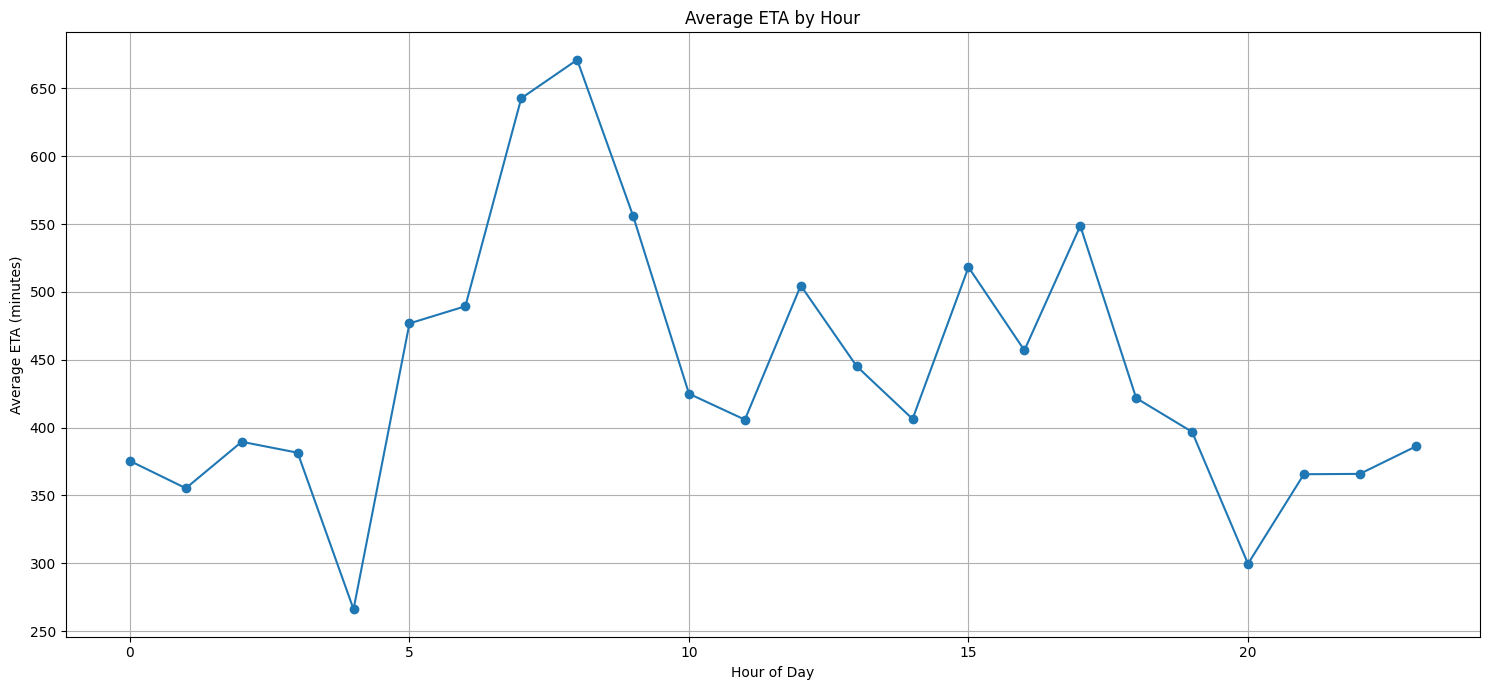


Average ETA by hour:
hour
0     375.433333
1     355.322148
2     389.554167
3     381.492308
4     266.119565
5     476.787234
6     489.456140
7     642.746615
8     671.086111
9     556.085020
10    424.969298
11    405.837931
12    504.691228
13    445.228070
14    406.383838
15    518.218437
16    456.958702
17    548.673118
18    421.725333
19    396.850163
20    299.627168
21    365.630769
22    365.896386
23    386.078829
Name: m_order_eta, dtype: float64


In [31]:
# Calculate average ETA by hour
avg_eta_by_hour = df.groupby('hour')['m_order_eta'].mean()

# Create the plot
plt.figure(figsize=(15, 7))
avg_eta_by_hour.plot(kind='line', marker='o')
plt.title('Average ETA by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average ETA (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the actual values
print("\nAverage ETA by hour:")
print(avg_eta_by_hour)

In [32]:
!pip install h3 folium

   ---------------------------------------- 0.0/810.1 kB ? eta -:--:--
   -------------------------------------- - 786.4/810.1 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 810.1/810.1 kB 3.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
# Import necessary libraries
import h3
import folium
from folium import plugins

# Convert lat/lon to h3 indices (size 8)
def get_hex_index(row):
    return h3.latlng_to_cell(row['origin_latitude'], row['origin_longitude'], 8)

# Add hex indices to dataframe
df['hex_index'] = df.apply(get_hex_index, axis=1)

# Count orders per hex
hex_counts = df['hex_index'].value_counts()

# Calculate threshold for 80% of orders
total_orders = hex_counts.sum()
cumsum = hex_counts.cumsum()
hex_80_percent = cumsum[cumsum <= 0.8 * total_orders].index.tolist()

# Create a dataframe with hex centers and counts
hex_centers = []
hex_fails = []
for hex_id in hex_80_percent:
    center = h3.cell_to_latlng(hex_id)  # Changed from h3_to_geo
    count = df[df['hex_index'] == hex_id]['order_status_key'].count()
    hex_centers.append([center[0], center[1]])
    hex_fails.append(count)

# Create the map centered on the mean coordinates
center_lat = df['origin_latitude'].mean()
center_lon = df['origin_longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add hexagons to the map
for i, center in enumerate(hex_centers):
    hex_boundary = h3.cell_to_boundary(hex_80_percent[i])  # Changed from h3_to_geo_boundary
    color = f'#{int(255 * (hex_fails[i]/max(hex_fails))):02x}0000'
    folium.Polygon(
        locations=hex_boundary,
        color=color,
        fill=True,
        popup=f'Fails: {hex_fails[i]}',
        fill_opacity=0.4
    ).add_to(m)

# Save the map
m.save('order_fails_map.html')

# Print statistics
print(f"Total number of hexagons containing 80% of orders: {len(hex_80_percent)}")

Total number of hexagons containing 80% of orders: 20
